In [1]:
%matplotlib inline
import numpy as np
from datetime import timezone, datetime, timedelta
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_ROMS_native, reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift

# Drift simulations for GEO4926 cruise

*2025-04-21, kaihc@met.no*

Ignoring wave-induced drift and simulating drift at fixed depths using high resolution coastal ocean forecasting model.

In [2]:
# Initialise cases
loglev = 20 # Set loglevel to 0 for debugging information
o1 = OceanDrift(loglevel=loglev)  

# Creating and adding reader for Norkyst m71 data (Oslofjord, two way nested)
ocean_data = reader_netCDF_CF_generic.Reader('https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_160m_m71_be')

10:24:32 INFO    opendrift:509: OpenDriftSimulation initialised (version 1.13.1)
10:24:32 INFO    opendrift.readers:61: Opening file with xr.open_dataset
10:25:31 INFO    opendrift.readers.reader_netCDF_CF_generic:332: Detected dimensions: {'z': 'depth', 'x': 'X', 'y': 'Y', 'time': 'time'}
10:25:31 INFO    opendrift.readers.basereader:176: Variable x_sea_water_velocity will be rotated from eastward_sea_water_velocity
10:25:31 INFO    opendrift.readers.basereader:176: Variable y_sea_water_velocity will be rotated from northward_sea_water_velocity
10:25:31 INFO    opendrift.readers.basereader:176: Variable x_wind will be rotated from eastward_wind
10:25:31 INFO    opendrift.readers.basereader:176: Variable y_wind will be rotated from northward_wind


In [3]:
# Initial position
ini_lat = 59.8783
ini_lon = 10.6563

# Number of particles and their depth distribution
N = 3
zvec = [0,-3,-10]

In [4]:
# Constant depth for each particles throughout.

# Add readers for input data
o1.add_reader([ocean_data])

# Configurations
o1.set_config('drift:vertical_mixing', False)
o1.set_config('drift:stokes_drift', False)

# Initialize and run
o1.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.now(), wind_drift_factor=0.0, terminal_velocity=0.0)
o1.run(duration=timedelta(hours=6), time_step=300)

10:25:31 INFO    opendrift.models.basemodel.environment:206: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
10:25:33 INFO    opendrift.models.basemodel.environment:233: Fallback values will be used for the following variables which have no readers: 
10:25:33 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_significant_height: 0.000000
10:25:33 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
10:25:33 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
10:25:33 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_period_at_variance_spectral_density_maximum: 0.000000
10:25:33 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
10:25:33 INFO    opendrift.models.base

<xarray.Dataset> Size: 31kB
Dimensions:                                                                              (
                                                                                          trajectory: 3,
                                                                                          time: 73)
Coordinates:
  * trajectory                                                                           (trajectory) int64 24B ...
  * time                                                                                 (time) datetime64[ns] 584B ...
Data variables: (12/35)
    status                                                                               (trajectory, time) float32 876B ...
    moving                                                                               (trajectory, time) float32 876B ...
    age_seconds                                                                          (trajectory, time) float32 876B ...
    origin_marker                                                                        (trajectory, time) float32 876B ...
    lon                                                                                  (trajectory, time) float32 876B ...
    lat                                                                                  (trajectory, time) float32 876B ...
    ...                                                                                   ...
    surface_downward_y_stress                                                            (trajectory, time) float32 876B ...
    turbulent_kinetic_energy                                                             (trajectory, time) float32 876B ...
    turbulent_generic_length_scale                                                       (trajectory, time) float32 876B ...
    ocean_mixed_layer_thickness                                                          (trajectory, time) float32 876B ...
    sea_floor_depth_below_sea_level                                                      (trajectory, time) float32 876B ...
    land_binary_mask                                                                     (trajectory, time) float32 876B ...
Attributes: (12/153)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    title:                                                                   ...
    summary:                                                                 ...
    keywords:                                                                ...
    ...                                                                                                               ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...
    geospatial_vertical_min:                                                 ...
    geospatial_vertical_max:                                                 ...
    geospatial_vertical_positive:                                            ...

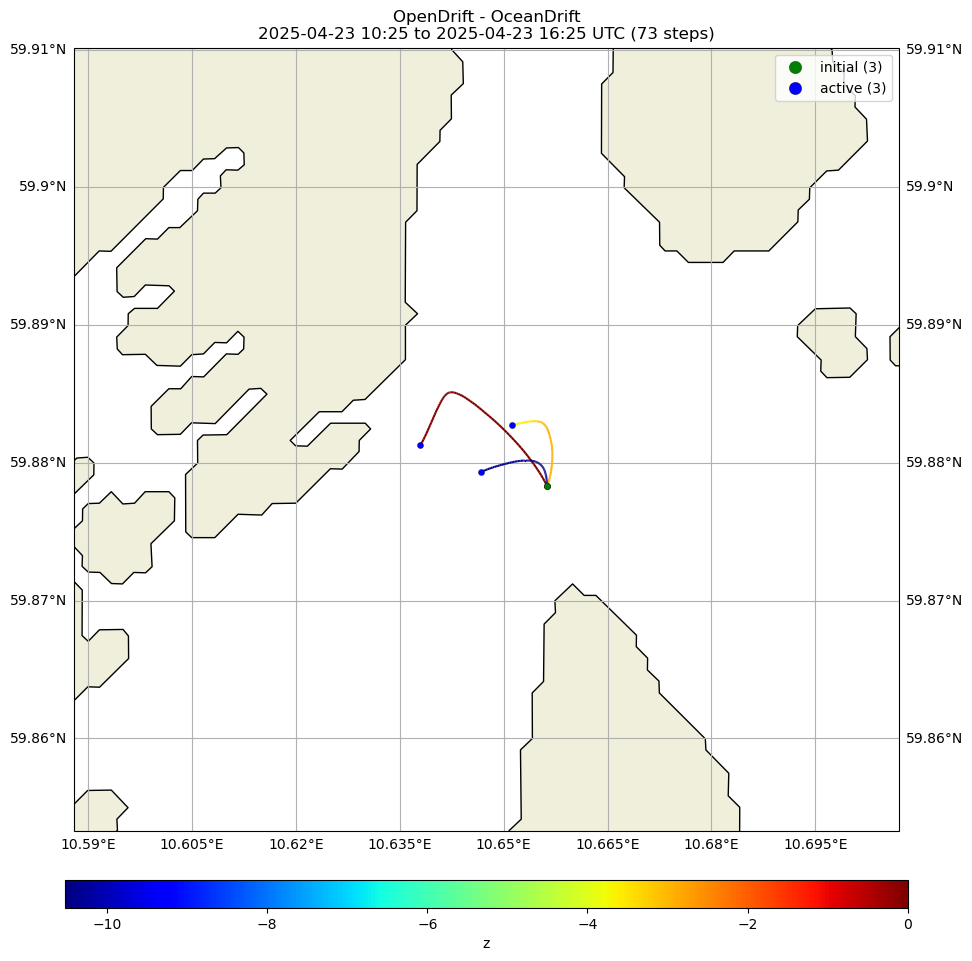

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:25 to 2025-04-23 16:25 UTC (73 steps)'}>,
 <Figure size 1100x1046.55 with 2 Axes>)

In [5]:
# Plot background currents
o1.plot(linecolor='z', buffer=0.025)

10:25:42 WARNING opendrift:2429: Plotting fast. This will make your plots less accurate.


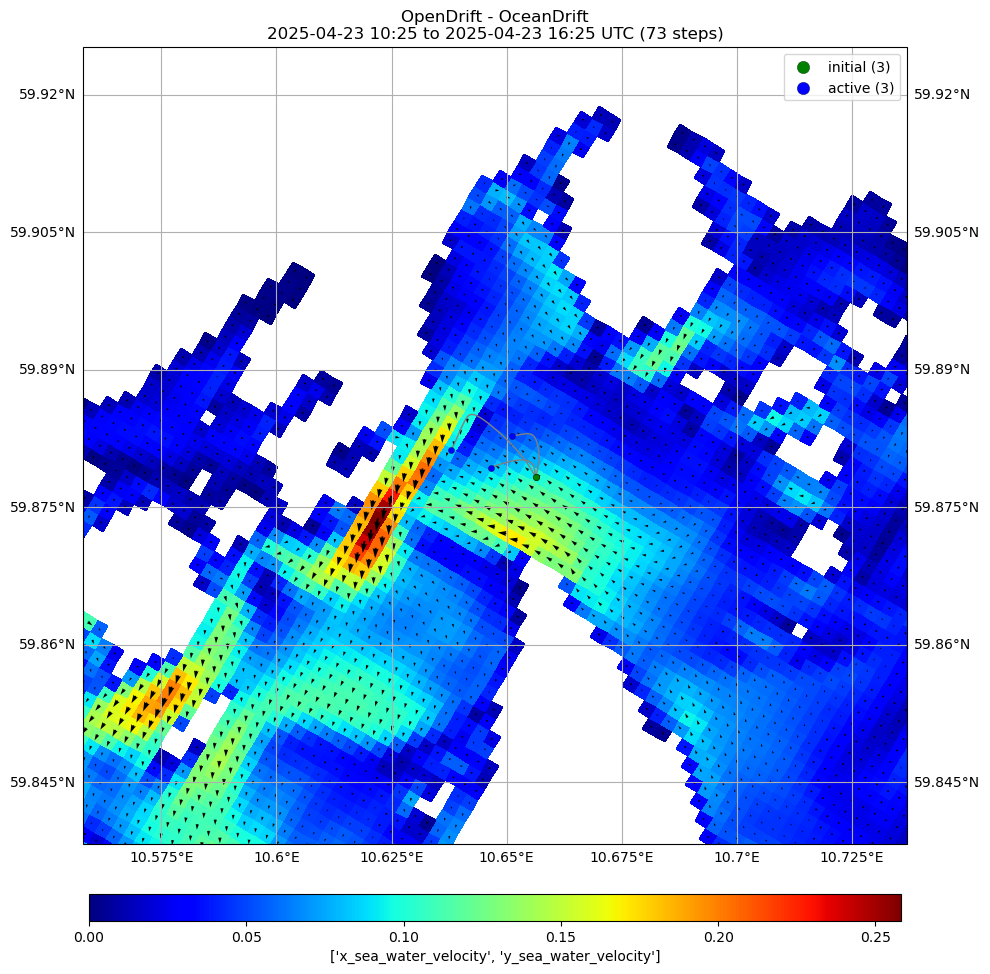

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:25 to 2025-04-23 16:25 UTC (73 steps)'}>,
 <Figure size 1100x1063.15 with 2 Axes>)

In [6]:
# Plot background currents
o1.plot(fast=True, buffer=0.04, hide_landmask=True, background=['x_sea_water_velocity', 'y_sea_water_velocity'])